<a href="https://colab.research.google.com/github/jordantangy/MoviePosterClassification-CNN/blob/main/CCN_colab_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0-rc0

     |████████████████████████████████| 86.3MB 84kB/s 
     |████████████████████████████████| 4.3MB 48.4MB/s 
     |████████████████████████████████| 501kB 47.5MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
data = pd.read_csv('/content/drive/MyDrive/duplicate_free_41K.csv')
truncat = data[:30000]
truncat



,id,poster,title,year,rating,genre,action,adventure,animation,comedy,crime,drama,fantasy,horror,mystery,romance,sci-fi,short,thriller
0,0,https://m.media-amazon.com/images/M/MV5BNDM0ND...,Construction,2021,7.4,"comedy, romance",0,0,0,1,0,0,0,0,0,1,0,0,0
1,1,https://m.media-amazon.com/images/M/MV5BNTgyZD...,RED,2020,10.0,horror,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,https://m.media-amazon.com/images/M/MV5BNGQzMT...,Huldra and Photographer,2020,10.0,"short, fantasy, horror",0,0,0,0,0,0,1,1,0,0,0,1,0
3,3,https://m.media-amazon.com/images/M/MV5BMWE2Yz...,Anti-dirt,2020,10.0,"short, action, comedy",1,0,0,1,0,0,0,0,0,0,0,1,0
4,4,https://m.media-amazon.com/images/M/MV5BOGI0Nz...,Asalu Em Jarigindhante,2020,10.0,drama,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,30023,https://m.media-amazon.com/images/M/MV5BMTU1Nj...,A Mother's Nightmare,2012,6.0,"crime, mystery, thriller",0,0,0,0,1,0,0,0,1,0,0,0,1
29996,30024,https://m.media-amazon.com/images/M/MV5BMTQ3Mz...,SheZow,2012,6.0,"animation, action, adventure",1,1,1,0,0,0,0,0,0,0,0,0,0
29997,30025,https://m.media-amazon.com/images/M/MV5BNDNkN2...,The Seven Year Hitch,2012,6.0,"comedy, romance",0,0,0,1,0,0,0,0,0,1,0,0,0
29998,30026,https://m.media-amazon.com/images/M/MV5BNjg5ZD...,Onii-chan Dakedo Ai Sae Areba Kankei Nai yo ne-,2012,6.0,animation,0,0,1,0,0,0,0,0,0,0,0,0,0


In [4]:
!unzip /content/drive/MyDrive/img_41K.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: img_41K/5496.jpg        
  inflating: img_41K/5497.jpg        
  inflating: img_41K/5498.jpg        
  inflating: img_41K/5499.jpg        
  inflating: img_41K/55.jpg          
  inflating: img_41K/550.jpg         
  inflating: img_41K/5500.jpg        
  inflating: img_41K/5501.jpg        
  inflating: img_41K/5502.jpg        
  inflating: img_41K/5503.jpg        
  inflating: img_41K/5504.jpg        
  inflating: img_41K/5505.jpg        
  inflating: img_41K/5506.jpg        
  inflating: img_41K/5507.jpg        
  inflating: img_41K/5508.jpg        
  inflating: img_41K/5509.jpg        
  inflating: img_41K/551.jpg         
  inflating: img_41K/5510.jpg        
  inflating: img_41K/5511.jpg        
  inflating: img_41K/5512.jpg        
  inflating: img_41K/5513.jpg        
  inflating: img_41K/5514.jpg        
  inflating: img_41K/5515.jpg        
  inflating: img_41K/5516.jpg        
  inflatin

In [5]:
pic_width = 224
pic_height = 224
X = []
for i in tqdm(range(int(truncat.shape[0]))):
  path = '/content/img_41K/'+ str(data['id'][i]) +'.jpg'
  img = image.load_img(path, target_size=(pic_width,pic_height,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

100%|██████████| 30000/30000 [01:29<00:00, 336.63it/s]


## Example of a picture from the DataSet and its classification 

In [6]:
X = np.array(X)

'comedy'

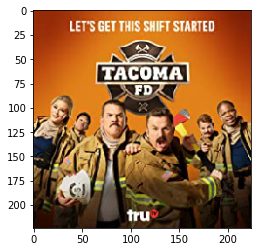

In [7]:
plt.imshow(X[2419])
data['genre'][2419]

In [8]:
#matrix y comes from the csv file, we just drop the column id and genre.
#So we have a matrix representing which genre each movie belongs to

y = truncat.drop(['id','poster','title','year','rating','genre'], axis = 1)
y = y.to_numpy()

In [9]:
train_size = int(X.shape[0]*0.80)
test_size = int(X.shape[0]*0.20)
X_train = X[:train_size]
X_test = X[:test_size]
y_train = y[:train_size]
y_test = y[:test_size]


In [16]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(13, activation='sigmoid'))

In [17]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=4, validation_data=(X_test, y_test))

Train on 24000 samples, validate on 6000 samples
Epoch 1/4
24000/24000 [==============================] - 340s 14ms/sample - loss: 0.5379 - accuracy: 0.7594 - val_loss: 0.4274 - val_accuracy: 0.8422
Epoch 2/4
24000/24000 [==============================] - 334s 14ms/sample - loss: 0.4215 - accuracy: 0.8286 - val_loss: 0.4308 - val_accuracy: 0.8424
Epoch 3/4
24000/24000 [==============================] - 345s 14ms/sample - loss: 0.4103 - accuracy: 0.8319 - val_loss: 0.4287 - val_accuracy: 0.8413
Epoch 4/4
24000/24000 [==============================] - 355s 15ms/sample - loss: 0.4056 - accuracy: 0.8333 - val_loss: 0.4117 - val_accuracy: 0.8390


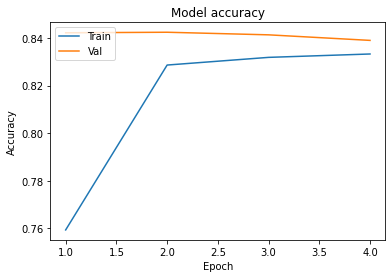

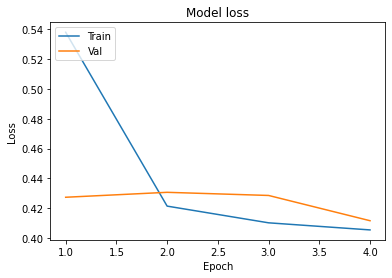

In [20]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 4)

[[0.16352662 0.08146077 0.04554084 0.09065121 0.13575736 0.34186238
  0.10282671 0.4116815  0.18582223 0.03366179 0.16927113 0.16697077
  0.32007852]]
[[0.16352662 0.08146077 0.04554084 0.09065121 0.13575736 0.34186238
  0.10282671 0.4116815  0.18582223 0.03366179 0.16927113 0.16697077
  0.32007852]]
sum :  2.249112
[ 9  2  1  3  6  4  0 11 10  8 12  5  7]
The 3 genres predicted for the Movie Fauda are :
thriller
drama
horror


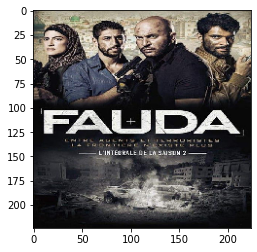

In [38]:
img = image.load_img('/content/Fauda.jpg', target_size=(pic_width,pic_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, pic_width, pic_height, 3)

genres = data.columns[6:]
y_prob = model.predict(img)
print(y_prob)
arr = np.array(y_prob)
print(arr)
print("sum : ", np.sum(arr))
top3 = np.argsort(y_prob[0])
print(top3)
print('The 3 genres predicted for the Movie Fauda are :')
for i in range(10,13):
  print(genres[top3][i])

Index(['action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
       'fantasy', 'horror', 'mystery', 'romance', 'sci-fi', 'short',
       'thriller'],
      dtype='object')
[[0.15783596 0.06272048 0.02586046 0.08649373 0.16299173 0.39415872
  0.08148265 0.3793124  0.17093605 0.03723946 0.11707187 0.12193745
  0.34579512]]
[[0.15783596 0.06272048 0.02586046 0.08649373 0.16299173 0.39415872
  0.08148265 0.3793124  0.17093605 0.03723946 0.11707187 0.12193745
  0.34579512]]
sum :  2.143836
[ 2  9  1  6  3 10 11  0  4  8 12  7  5]
The 3 genres predicted for the Movie Fauda are :
thriller
horror
drama


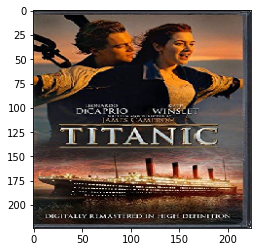

In [41]:
img = image.load_img('/content/51mTtUGvUCL._SY445_.jpg', target_size=(pic_width,pic_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, pic_width, pic_height, 3)

genres = data.columns[6:]
print(genres)
y_prob = model.predict(img)
print(y_prob)
arr = np.array(y_prob)
print(arr)
print("sum : ", np.sum(arr))
top3 = np.argsort(y_prob[0])
print(top3)
print('The 3 genres predicted for the Movie Fauda are :')
for i in range(10,13):
  print(genres[top3][i])

Index(['action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
       'fantasy', 'horror', 'mystery', 'romance', 'sci-fi', 'short',
       'thriller'],
      dtype='object')
[[0.10730493 0.08296853 0.07541522 0.2982769  0.11062598 0.583198
  0.09443146 0.03978479 0.12536274 0.30348215 0.06361126 0.09806626
  0.12964366]]
[[0.10730493 0.08296853 0.07541522 0.2982769  0.11062598 0.583198
  0.09443146 0.03978479 0.12536274 0.30348215 0.06361126 0.09806626
  0.12964366]]
sum :  2.112172
[ 7 10  2  1  6 11  0  4  8 12  3  9  5]
The 3 genres predicted for the Movie Fauda are :
comedy
romance
drama


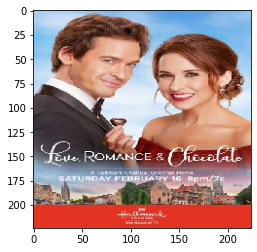

In [45]:
img = image.load_img('/content/love-romance-chocolate-movie-poster-md.jpg', target_size=(pic_width,pic_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, pic_width, pic_height, 3)

genres = data.columns[6:]
print(genres)
y_prob = model.predict(img)
print(y_prob)
arr = np.array(y_prob)
print(arr)
print("sum : ", np.sum(arr))
top3 = np.argsort(y_prob[0])
print(top3)
print('The 3 genres predicted for the Movie Fauda are :')
for i in range(10,13):
  print(genres[top3][i])